In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [49]:
df = pd.read_csv('heart_disease.csv')

In [50]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df.shape

(303, 15)

In [52]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [53]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df.drop('target', axis = 1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

<AxesSubplot:title={'center':'correlation with the target'}>

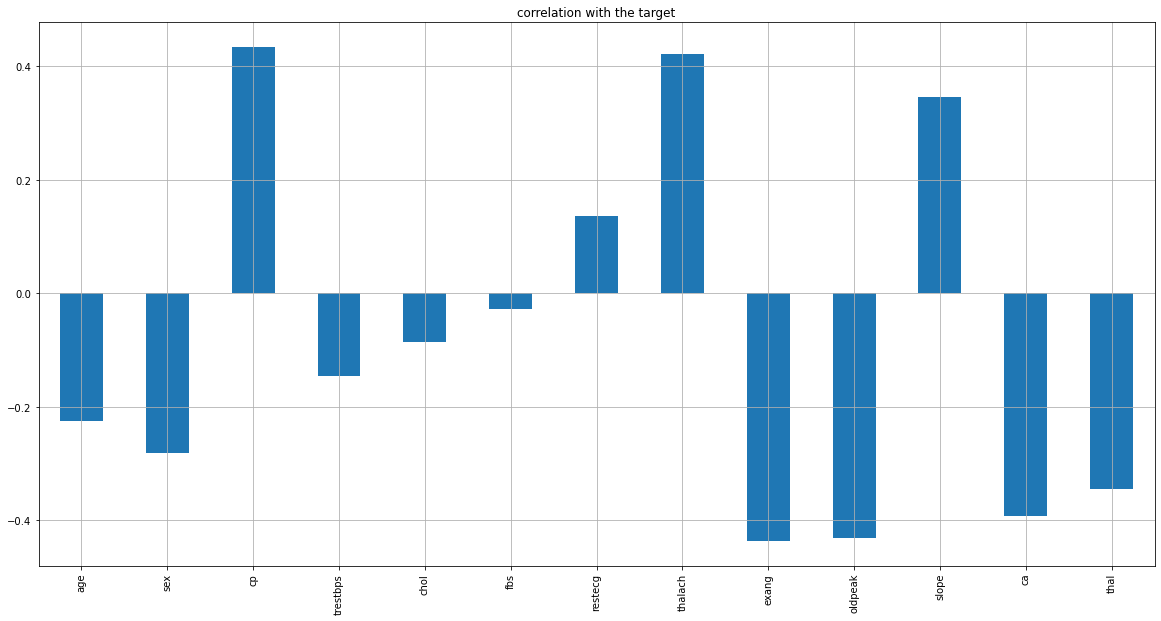

In [9]:
df.drop('target', axis = 1).corrwith(df.target).plot(kind = 'bar', grid = True, figsize = (20, 10), title = 'correlation with the target')

In [55]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [56]:
x = df.drop(['target'], axis = 1)
y = df.target

In [57]:
spercentile = SelectPercentile(score_func = chi2, percentile = 80)
                        
spercentile= spercentile.fit(x, y)

In [58]:
cols = spercentile.get_support(indices = True)

In [59]:
cols

array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11], dtype=int64)

In [60]:
print("Features of indexes are ", cols)

Features of indexes are  [ 0  1  2  3  4  7  8  9 10 11]


In [61]:
features = x.columns[cols]

In [62]:
print('Features are here= ', list(features))

Features are here=  ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [63]:
df_scores = pd.DataFrame({'Features':x.columns, 'chi2 score':spercentile.scores_, 'pvalues':spercentile.pvalues_})

In [64]:
df_scores

,Features,chi2 score,pvalues
0,age,23.286624,1.395673e-06
1,sex,7.576835,5.912318e-03
2,cp,62.598098,2.534982e-15
3,trestbps,14.823925,1.180286e-04
4,chol,23.936394,9.957148e-07
5,fbs,0.202934,6.523632e-01
6,restecg,2.978271,8.438939e-02
7,thalach,188.320472,7.395102e-43
8,exang,38.914377,4.428074e-10
9,oldpeak,72.644253,1.552583e-17


In [65]:
x = df[features]
y = df.target

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
x_scaler = scaler.fit_transform(x)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size = 0.3, random_state = 42)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
gdbc = GradientBoostingClassifier()
gdbc.fit(x_train, y_train)
pred = gdbc.predict(x_train)
gdbc.report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))

print("\n=====================Train Result============================")

print(f"Accuracy score: {accuracy_score(y_train, pred) *100:.2f}%")
    
print("_______________________________________________________________")

print(f"Classification Report:\n{gdbc.report}")
    
print("_______________________________________________________________")

print(f"Confusion_matrix: \n {confusion_matrix(y_train, pred)}\n")

    
    



=====================Train Result============================
Accuracy score: 100.00%
_______________________________________________________________
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________________________
Confusion_matrix: 
 [[ 97   0]
 [  0 115]]



In [73]:
pred = gdbc.predict(x_test)
gdbc.report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))

print("\n=====================Test Result============================")

print(f"Accuracy score: {accuracy_score(y_test, pred) *100:.2f}%")
    
print("_______________________________________________________________")

print(f"Classification Report:\n{gdbc.report}")
    
print("_______________________________________________________________")

print(f"Confusion_matrix: \n {confusion_matrix(y_test, pred)}\n")


=====================Test Result============================
Accuracy score: 83.52%
_______________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000000
_______________________________________________________________
Confusion_matrix: 
 [[34  7]
 [ 8 42]]



In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
grid_param = {
    'max_depth' :range(4, 28), 
    'min_samples_split' : range(2, 34, 2),
    'learning_rate' : np.arange(0.1, 1.9)
    }

In [76]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid = grid_param)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 1.1, 'max_depth': 10, 'min_samples_split': 12}

In [46]:
gdbc = GradientBoostingClassifier(learning_rate= 1.1, max_depth= 20, min_samples_split= 8)
gdbc.fit(x_train, y_train)
pred = gdbc.predict(x_train)
gdbc.report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))

print("\n=====================Train Result============================")

print(f"Accuracy score: {accuracy_score(y_train, pred) *100:.2f}%")
    
print("_______________________________________________________________")

print(f"Classification Report:\n{gdbc.report}")
    
print("_______________________________________________________________")

print(f"Confusion_matrix: \n {confusion_matrix(y_train, pred)}\n")



=====================Train Result============================
Accuracy score: 100.00%
_______________________________________________________________
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________________________
Confusion_matrix: 
 [[ 97   0]
 [  0 115]]



In [47]:
pred = gdbc.predict(x_test)
gdbc.report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))

print("\n=====================Test Result============================")

print(f"Accuracy score: {accuracy_score(y_test, pred) *100:.2f}%")
    
print("_______________________________________________________________")

print(f"Classification Report:\n{gdbc.report}")
    
print("_______________________________________________________________")

print(f"Confusion_matrix: \n {confusion_matrix(y_test, pred)}\n")


=====================Test Result============================
Accuracy score: 82.42%
_______________________________________________________________
Classification Report:
                   0      1  accuracy  macro avg  weighted avg
precision   0.804878   0.84  0.824176   0.822439      0.824176
recall      0.804878   0.84  0.824176   0.822439      0.824176
f1-score    0.804878   0.84  0.824176   0.822439      0.824176
support    41.000000  50.00  0.824176  91.000000     91.000000
_______________________________________________________________
Confusion_matrix: 
 [[33  8]
 [ 8 42]]

